In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


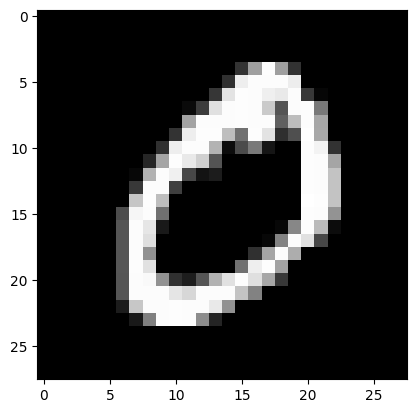

In [ ]:
sample = 1
image = X_train[sample]

fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
num = 12
images = X_train[:num]
labels = y_train[:num]

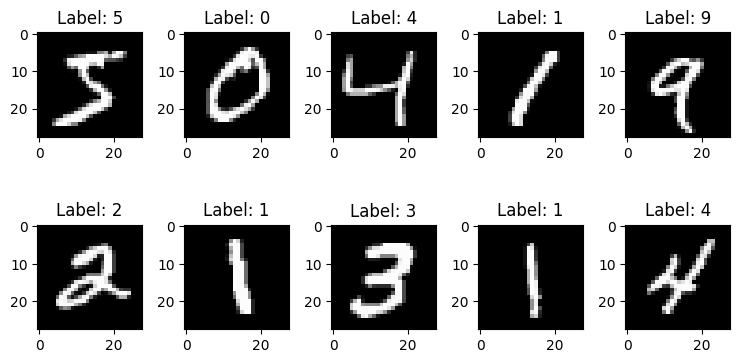

In [ ]:
num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
x_train_flattened = X_train.reshape(X_train.shape[0], -1) / 255.0
x_test_flattened = X_test.reshape(X_test.shape[0], -1) / 255.0

In [ ]:
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

kmeans.fit(x_train_flattened)

y_kmeans = kmeans.predict(x_test_flattened)

In [ ]:
print("Cluster centers:", kmeans.cluster_centers_)

Cluster centers: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# import numpy as np
# np.set_printoptions(threshold=np.inf)
# print("Cluster centers:", kmeans.cluster_centers_)

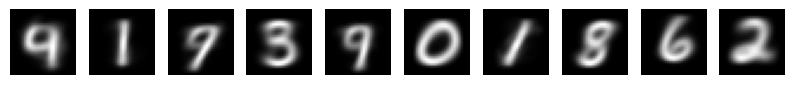

In [ ]:
fig, axes = plt.subplots(1, num_clusters, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the K-Means clustering on the test data
score = silhouette_score(x_test_flattened, y_kmeans)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.0586


In [ ]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Calculate the ARI and NMI scores
ari = adjusted_rand_score(y_test, y_kmeans)
nmi = normalized_mutual_info_score(y_test, y_kmeans)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

Adjusted Rand Index: 0.3667
Normalized Mutual Information: 0.4926
